### Get data
  

In [1]:
!echo "Downloading files..."
!wget -q https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/roadsigns/training1.zip
!wget -q https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/roadsigns/training2.zip
#!wget -q https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/roadsigns/holdout.zip

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
#!unzip -q /content/holdout.zip

# Cleanup
!echo "Cleaning up..."
!rm training1.zip
!rm training2.zip
#!rm holdout.zip

!cp -r training2/* training1/
!rm -rf training2/
!mv training1/ training/

!echo "Data ready."

Unzipping files...
Cleaning up...
Data ready.


In [5]:
#!rm -rf training*/

### Import libraries

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory


import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
training_dir = '/content/training/'
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=.2,
    #horizontal_flip=True
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=.2
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = image_size,
    subset="training",
    batch_size=6,
    class_mode='sparse',
    shuffle=True
    # seed=42,
)
validation_generator = validation_datagen.flow_from_directory(
    training_dir,
    target_size=image_size,
    batch_size=6,
    class_mode='sparse',
    subset="validation",
    # seed=42
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


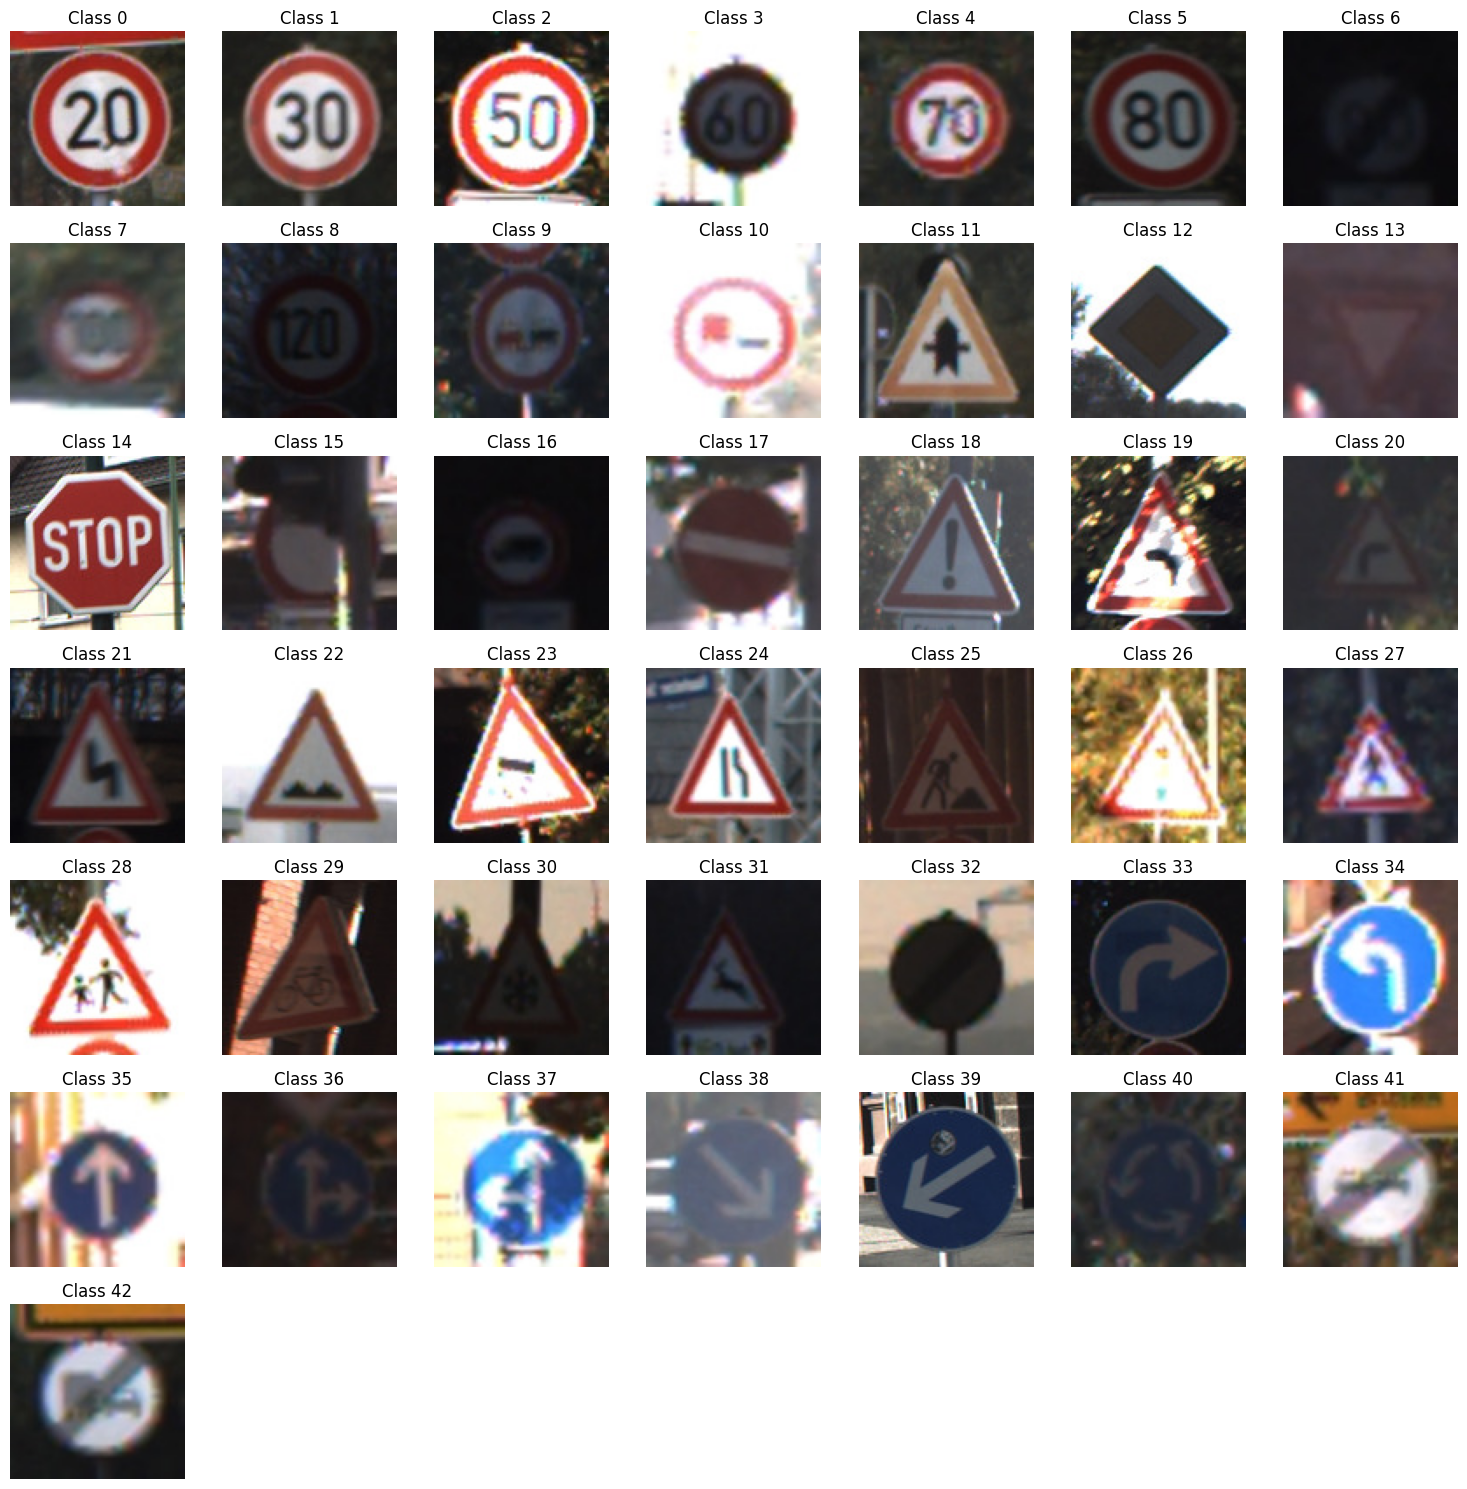

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionary to store one image per class
classes_to_display = 43  # Number of classes
class_images = {}
class_labels = {}

# Iterate through the validation_generator
for images, labels in validation_generator:
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Convert label to integer
        if lbl not in class_images:  # If this class is not already added
            class_images[lbl] = img  # Save the image
            class_labels[lbl] = lbl  # Save the label
        if len(class_images) == classes_to_display:  # Stop when all classes are found
            break
    if len(class_images) == classes_to_display:
        break

# Plot the collected images
plt.figure(figsize=(15, 15))
for idx in range(classes_to_display):
    ax = plt.subplot(7, 7, idx + 1)  # Adjust grid size as needed
    image = np.array(class_images[idx]) * 255  # Rescale back to original
    plt.imshow(image.astype("uint8"))
    plt.title(f"Class {class_labels[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(100, 100, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='leaky_relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='leaky_relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='leaky_relu'))
model.add(layers.Dense(64, activation='leaky_relu'))
model.add(layers.Dense(43))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,450,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           2,795 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,850,283 (56.65 MB)

 Trainable params: 14,850,283 (56.65 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint6.weights.h5'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)
hist = model.fit(
        train_generator,
        steps_per_epoch=120,
        epochs=30,
        validation_data=validation_generator,
        # callbacks=[model_checkpoint_callback],
        initial_epoch=0)

# model.load_weights(checkpoint_filepath)

313/313 - 2s - loss: 0.7805 - accuracy: 0.7364 - 2s/epoch - 5ms/step
0.7804666757583618 0.7364000082015991


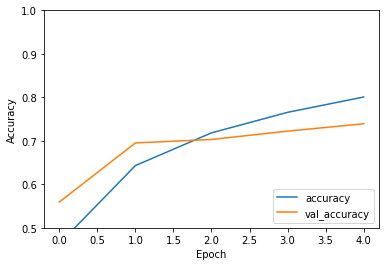

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

In [ ]:
predictions = model.predict(test_images)


In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix
predictions_new = np.argmax(predictions,axis=1)
confusion_matrix(test_labels,predictions_new)

array([[783,  16,  32,  22,  20,   5,   4,  10,  93,  15],
       [ 16, 875,   4,   3,   8,   7,   4,   7,  32,  44],
       [ 80,   7, 582,  43, 127,  63,  49,  25,  19,   5],
       [ 24,   7,  75, 552, 100, 151,  38,  29,  17,   7],
       [ 12,   2,  37,  45, 792,  22,  22,  50,  17,   1],
       [ 15,   2,  45, 169,  57, 646,   7,  44,  12,   3],
       [ 12,   5,  45,  59,  75,  26, 753,  10,  11,   4],
       [ 12,   3,  26,  35, 131,  48,   1, 739,   4,   1],
       [ 63,  19,   8,   9,   9,   4,   3,   6, 867,  12],
       [ 29,  91,   5,  18,  15,   6,   5,  16,  40, 775]])

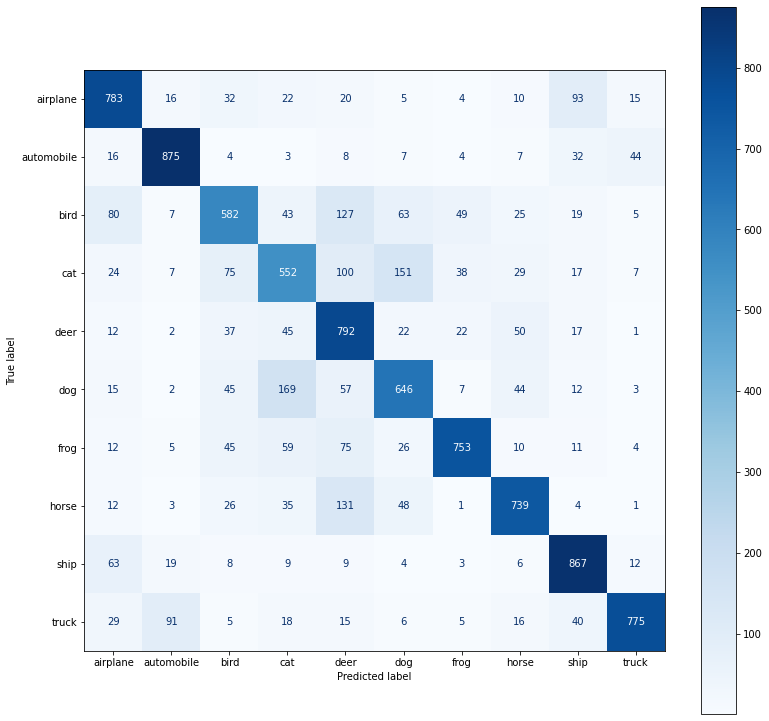

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, predictions_new)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(13,13)) # For changing the size of the plot
cmd.plot(ax=ax, cmap="Blues", values_format='.5g') # The .5g is for removing scientific notation in the confusion matrix

# plot_confusion_matrix(model, X_test, y_test, cmap='Blues')



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,predictions_new))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1000
           1       0.85      0.88      0.86      1000
           2       0.68      0.58      0.63      1000
           3       0.58      0.55      0.56      1000
           4       0.59      0.79      0.68      1000
           5       0.66      0.65      0.65      1000
           6       0.85      0.75      0.80      1000
           7       0.79      0.74      0.76      1000
           8       0.78      0.87      0.82      1000
           9       0.89      0.78      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

